# Input de dados  
### Desenvolvimento de modelos visando a inferência de valores em variáveis contendo `NaN` (nulo)
- Variáveis:
    - ic_sexo
    - ic_tipo_renda
    - ic_infmo_renda
    - dt_apuracao_renda

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from IPython.display import Image
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Ler o arquivo
# Resultado do 01.1_tratamento_filtros_dados_renda.ipynb
df_renda = pd.read_csv("../../../dados/amostra_sicli_tratada/cli_renda_amostra_regras_tratamento.csv", sep=';')
df_renda.shape

(2382027, 13)

In [4]:
df_renda.columns

Index(['nu_pessoa', 'dt_nascimento', 'ic_tipo_renda', 'vr_renda_bruta',
       'vr_renda_liquida', 'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo',
       'ic_situacao', 'ic_inconsistencia', 'nu_estdo_civil_p27', 'idade',
       'valido'],
      dtype='object')

In [5]:
# Definição das features (inputs) e label (target)
# Todas as features
features = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo', 'ic_tipo_renda',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade', 'valido']

# features e label ic_sexo
features_sexo = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'ic_infmo_renda', 'dt_apuracao_renda', 'ic_tipo_renda',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade']
label_ic_sexo     = ['ic_sexo']

# features e label ic_tipo_renda
features_tp_renda = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'ic_infmo_renda', 'dt_apuracao_renda', 'ic_sexo',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade']
label_tp_renda    = ['ic_tipo_renda']

# features e label ic_infmo_renda
features_infmo_renda = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'dt_apuracao_renda', 'ic_sexo', 'ic_tipo_renda',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade']
label_infmo_renda = ['ic_infmo_renda']

# features e label dt_apuracao_renda
features_dt_apuracao = ['vr_renda_bruta', 'vr_renda_liquida', #'dt_nascimento', 
            'ic_infmo_renda', 'ic_sexo', 'ic_tipo_renda',
            'ic_situacao', 'nu_estdo_civil_p27', 'idade']
label_dt_apuracao = ['dt_apuracao_renda']

 ### Quantitativo de dados válidos e inválidos

In [6]:
df_validos   = df_renda[df_renda['valido'] == True]
df_invalidos = df_renda[df_renda['valido'] == False]

print('Válidos:   ', df_validos.shape)
print('Inválidos: ', df_invalidos.shape)

Válidos:    (1221998, 13)
Inválidos:  (1160029, 13)


# ic_sexo

In [7]:
print('Válidos:')
print(df_validos['ic_sexo'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_sexo'].value_counts())

Válidos:
M    617715
F    603686
?       597
Name: ic_sexo, dtype: int64
Inválidos:
M    629606
F    526174
?      4249
Name: ic_sexo, dtype: int64


### Inconsistências em ic_sexo
- `? = 597` nos registros válidos
- `? = 4249` nos registros inválidos
- Total: `4846` inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_sexo_treino contendo os `M` e `F` válidos que serão usados para treino e validação.
    - df_ic_sexo_inferir contendo os `4846` registros que serão inferidos pelo modelo treinado.

In [8]:
# registros consistentes
df_ic_sexo_treino  = df_validos[df_validos['ic_sexo'] != '?']

# df_renda será usado porque existem registros INCONSISTENTES de
# ic_sexo em ambos datasets (válidos e inválidos)
df_ic_sexo_inferir = df_renda[df_renda['ic_sexo'] == '?']
print('Treino:  ', df_ic_sexo_treino.shape)
print('Inferir: ', df_ic_sexo_inferir.shape)

Treino:   (1221401, 13)
Inferir:  (4846, 13)


# ic_tipo_renda

In [9]:
print('Válidos:')
print(df_validos['ic_tipo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_tipo_renda'].value_counts())

Válidos:
F    729319
I    492679
Name: ic_tipo_renda, dtype: int64
Inválidos:
?    658335
F    398215
I    103479
Name: ic_tipo_renda, dtype: int64


### Inconsistências em ic_tipo_renda
- `? = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_tipo_renda_treino contendo os `F` e `I` válidos que serão usados para treino e validação.
    - df_ic_tipo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [10]:
# registros consistentes
df_ic_tipo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_tipo_renda_inferir = df_invalidos[df_invalidos['ic_tipo_renda'] == '?']
print('Treino:  ', df_ic_tipo_renda_treino.shape)
print('Inferir: ', df_ic_tipo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# ic_infmo_renda

In [11]:
print('Válidos:')
print(df_validos['ic_infmo_renda'].value_counts())
print('Inválidos:')
print(df_invalidos['ic_infmo_renda'].value_counts())

Válidos:
2.0    538634
6.0    344764
3.0    292274
5.0     46326
Name: ic_infmo_renda, dtype: int64
Inválidos:
0.0    658335
5.0    221813
3.0    106344
6.0     92123
2.0     81414
Name: ic_infmo_renda, dtype: int64


### Inconsistências em ic_infmo_renda
- `0.0 = 658335` registros inválidos
- Serão separados os registros em dois conjuntos de dados
    - df_ic_infmo_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_ic_infmo_renda_inferir contendo os `658335` registros que serão inferidos pelo modelo treinado.

In [12]:
# registros consistentes
df_ic_infmo_renda_treino  = df_validos

# registros INCONSISTENTES
df_ic_infmo_renda_inferir = df_invalidos[df_invalidos['ic_infmo_renda'] == 0]
print('Treino:  ', df_ic_infmo_renda_treino.shape)
print('Inferir: ', df_ic_infmo_renda_inferir.shape)

Treino:   (1221998, 13)
Inferir:  (658335, 13)


# dt_apuracao_renda

In [13]:
print('Válidos:')
print((df_validos['dt_apuracao_renda'] == 0).value_counts())
print('Inválidos:')
print((df_invalidos['dt_apuracao_renda'] == 0).value_counts())

Válidos:
False    1221998
Name: dt_apuracao_renda, dtype: int64
Inválidos:
True     767164
False    392865
Name: dt_apuracao_renda, dtype: int64


### Inconsistências em dt_apuracao_renda
- Em **Inválidos** `True = 767164` são registros **inconsistentes**, no caso sem dt_apuracao_renda
- Serão separados os registros em dois conjuntos de dados
    - df_dt_apuracao_renda_treino contendo os registros válidos que serão usados para treino e validação.
    - df_dt_apuracao_renda_inferir contendo os `767164` registros que serão inferidos pelo modelo treinado.

In [14]:
df_features = df_dt_apuracao_renda[features_dt_apuracao]
df_label    = df_dt_apuracao_renda[label_dt_apuracao]

print(df_features.shape)
print(df_label.shape)

(1221401, 8)
(1221401, 1)


In [15]:
df_features

,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_tipo_renda,ic_situacao,nu_estdo_civil_p27,idade
0,0.00,0.00,2.0,201710,I,1,9,66
1,975.00,897.00,6.0,201709,F,1,9,34
2,1530.00,1407.60,6.0,201709,F,1,9,34
3,0.00,0.00,2.0,201511,I,1,9,52
4,0.00,0.00,2.0,201702,I,1,1,47
...,...,...,...,...,...,...,...,...
1221993,0.00,0.00,2.0,201412,I,1,1,24
1221994,0.00,0.00,2.0,201603,I,1,9,53
1221995,978.58,978.58,6.0,201509,F,1,9,55
1221996,788.00,788.00,3.0,201510,F,1,1,29


# Gera amostragem conforme a calculadora:  
- https://www.solvis.com.br/calculos-de-amostragem/  

- **Calculadora 2**
    - População: 1.741.828
    - Margem de erro (%): 1
    - Confiabilidade (%): 99
    - Tamanho da Amostra: 16419
        - Será usada a metade dessa proporção por questões de tempo computacional.

In [16]:
# Amostra extratificada
from sklearn.model_selection import train_test_split

X, y = df_features[features_sexo], df_label[label_ic_sexo]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.007, #0.013441941, 
                                                    random_state=42,
                                                    stratify=df_features['ic_tipo_renda'])

del X_train
del y_train

#print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8550, 8) (8550, 1)


#### `X` e `y` correspondem as variáveis independentes e dependente, respectivamente.

In [17]:
X = X_test
y = y_test

del X_test, y_test

print(X.shape,y.shape)

(8550, 8) (8550, 1)


Essa amostra será dividida no conjunto de dados para o `treino` e `teste`

## Quantitativo por variáveis categóricas

In [18]:
print('ic_sexo:')
print(y['ic_sexo'].value_counts())

print('ic_tipo_renda:')
print(X['ic_tipo_renda'].value_counts())

print('ic_infmo_renda:')
print(X['ic_infmo_renda'].value_counts())

ic_sexo:
F    4344
M    4206
Name: ic_sexo, dtype: int64
ic_tipo_renda:
F    5102
I    3448
Name: ic_tipo_renda, dtype: int64
ic_infmo_renda:
2.0    3795
6.0    2357
3.0    2089
5.0     309
Name: ic_infmo_renda, dtype: int64


||Variáveis Usadas na Estratificada||
|---|---|---|
|**ic_infmo_renda**|**ic_tipo_renda**|**ic_tipo_renda & ic_infmo_renda**|
|--------------------------|--------------------------|--------------------------|
|**ic_sexo**|**ic_sexo**|**ic_sexo**|
|M - 4331 | **F - 4344** | M - 4420|
|F - 4219 | **M - 4206** | F - 4130|
||||
|**ic_tipo_renda**|**ic_tipo_renda**|**ic_tipo_renda**|
|F - 5180 | **F - 5102** | F - 5101|
|I - 3370 | **I - 3448** | I - 3449|
||||
|**ic_infmo_renda**|**ic_infmo_renda**|**ic_infmo_renda**|
|2.0 - 3769 | **2.0 - 3795** | 2.0 - 3768|
|6.0 - 2412 | **6.0 - 2357** | 6.0 - 2413|
|3.0 - 2045 | **3.0 - 2089** | 3.0 - 2045| 
|5.0 - 324 | **5.0 - 309** | 5.0 - 324| 

- Foi observado que a amostragem estratificada por `ic_tipo_renda` deixou `ic_sexo = F` em maior proporção.
    - Originalmente a maioria é do sexo masculino.
- Isso é interessante porque o desbalaneamento da variável dependente `ic_sexo` está, então, no fato da renda ser formal ou informal.
- Portanto, a estratificação será feita por `ic_tipo_renda`, pois mantem um melhor equilibrio entre `ic_sexo = M` e `ic_sexo = F`.

### Quantidade de registros por ic_sexo

In [19]:
y['ic_sexo'].value_counts()

F    4344
M    4206
Name: ic_sexo, dtype: int64

In [20]:
# Divisão do dataset em porções train e test.
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.33,
                      shuffle=True,
                      random_state=42,
                      stratify=X['ic_tipo_renda'])

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5728, 8) (5728, 1)
(2822, 8) (2822, 1)


- 11000 amostras para o treinamento dos modelos
- 5419 amostras para a validação da acurácia dos modelos

# Transforma em números (encoding) as variáveis categóricas

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
### ic_sexo 1 = M e 0 = F ###
###################################
le = le.fit(y_train['ic_sexo'])
y_train['ic_sexo'] = le.transform(y_train['ic_sexo'])

# aplica no y_test
le = le.fit(y_test['ic_sexo'])
y_test['ic_sexo'] = le.transform(y_test['ic_sexo'])

### encoding das variáveis categóricas ###
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_train['ic_tipo_renda'])
X_train['ic_tipo_renda'] = le.transform(X_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(X_test['ic_tipo_renda'])
X_test['ic_tipo_renda'] = le.transform(X_test['ic_tipo_renda'])
###################################

#print(y_train.ic_sexo.value_counts())

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Bibliotecas usadas na preparação, treinamento e na validação

In [22]:
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Aprendizado Supervisionado - Classificação

### Algoritmos de Classificação

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### Parâmetros de configuração da validação por KFold

Definição de quantidade de folds, definição da seed a ser utilizada, e definição da métrica de avaliação. K-fold é um método de treinamento a ser usado em conjuntos de dados de tamanho moderado devido ao seu treinamento consumir bastante tempo.  

Referência: 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [24]:
num_folds = 10
seed = 42
scoring = 'accuracy'

# Pipeline de avaliação de desempenho de algoritmos  
### Classificação Supervisionada

In [25]:
# Verificação do score de cada algoritmo. Avaliação de desempenho de cada modelo.
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)))
#models.append(('SVM', LinearSVC()))
models.append(('SVM', SVC(kernel='rbf', gamma=0.7, C=0.2)))
models.append(('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                         algorithm="SAMME",
                                         n_estimators=200)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.538410 (0.014333)
LDA: 0.533867 (0.012143)
KNN: 0.530383 (0.022091)
CART: 0.527593 (0.025205)
NB: 0.535097 (0.017967)
RF: 0.548014 (0.016537)
SVM: 0.514491 (0.012553)
ADT: 0.547486 (0.019109)


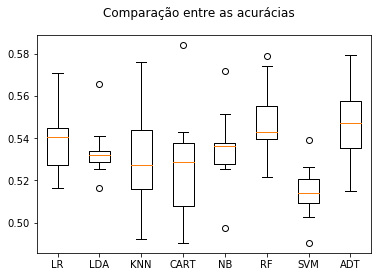

In [26]:
# Visualização das acurácias dos diferentes modelos.
fig = pyplot.figure()
fig.suptitle('Comparação entre as acurácias')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
# Padronização do dataset, utilizando StandardScaler
# Aplica normalização por z-score
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_jobs=-1))])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(max_depth=2, 
                                                                                             random_state=0, 
                                                                                             n_jobs=-1))])))
#pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', LinearSVC())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(kernel='rbf', 
                                                                            gamma=0.7, 
                                                                            C=0.2))])))
pipelines.append(('ADT', Pipeline([('Scaler', StandardScaler()),('ADT', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                                                                           algorithm="SAMME",
                                                                                           n_estimators=200))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.537185 (0.017197)
LDA: 0.533867 (0.012143)
KNN: 0.528983 (0.014467)
CART: 0.528467 (0.030407)
NB: 0.535097 (0.017967)
RF: 0.548014 (0.016537)
SVM: 0.548712 (0.021106)
ADT: 0.547486 (0.019109)


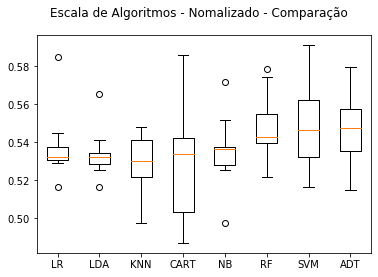

In [28]:
# Visualização das acurácias dos diferentes modelos pós-normalização do dataset.
fig = pyplot.figure()
fig.suptitle('Escala de Algoritmos - Nomalizado - Comparação')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Otimização de parâmetros dos modelos selecionados
- KNN
- AdaBoost CART
- Logistic Regression
- svm.SVC(RBF)

# KNN

In [29]:
# Ajuste de parâmetros do modelo KNN. Tuning
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
param_grid = dict(n_neighbors=neighbors)

model = KNeighborsClassifier(n_jobs=-1)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

#grid_result = grid.fit(rescaledX, y_train)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.544869 using {'n_neighbors': 14}
0.517982 (0.015388) with: {'n_neighbors': 1}
0.515716 (0.023761) with: {'n_neighbors': 2}
0.525319 (0.020178) with: {'n_neighbors': 3}
0.532303 (0.017314) with: {'n_neighbors': 4}
0.530383 (0.022091) with: {'n_neighbors': 5}
0.534392 (0.025000) with: {'n_neighbors': 6}
0.531607 (0.024688) with: {'n_neighbors': 7}
0.538065 (0.023231) with: {'n_neighbors': 8}
0.532482 (0.031359) with: {'n_neighbors': 9}
0.533700 (0.023906) with: {'n_neighbors': 10}
0.531255 (0.026700) with: {'n_neighbors': 11}
0.541552 (0.022367) with: {'n_neighbors': 12}
0.539283 (0.019977) with: {'n_neighbors': 13}
0.544869 (0.023139) with: {'n_neighbors': 14}
0.537190 (0.022865) with: {'n_neighbors': 15}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# AdaBoost(CART)

In [30]:
# Ajuste de parâmetros do modelo ADT - AdaBoost Decison Tree Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators = [250, 255, 260, 265, 270]
learning_rate = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
algorithm = ['SAMME', 'SAMME.R']
param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best: 0.560058 using {'algorithm': 'SAMME.R', 'learning_rate': 0.51, 'n_estimators': 250}
0.544172 (0.016772) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 250}
0.543998 (0.015901) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 255}
0.543998 (0.015901) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 260}
0.543998 (0.015901) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 265}
0.543822 (0.016346) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 270}
0.542950 (0.016845) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 250}
0.543822 (0.015794) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 255}
0.543997 (0.016728) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 260}
0.544520 (0.017282) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_estimators': 265}
0.544346 (0.017482) with: {'algorithm': 'SAMME', 'learning_rate': 0.51, 'n_est

# Logistic Regression

In [31]:
# Ajuste de parâmetros do modelo Logistic Regression Tuning
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

solver = ['newton-cg','lbfgs','liblinear','sag','saga']

param_grid = dict(solver=solver)

model = LogisticRegression()

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)
#grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.540158 using {'solver': 'sag'}
0.532297 (0.018580) with: {'solver': 'newton-cg'}
0.534047 (0.016341) with: {'solver': 'lbfgs'}
0.538410 (0.014333) with: {'solver': 'liblinear'}
0.540158 (0.015792) with: {'solver': 'sag'}
0.539635 (0.014716) with: {'solver': 'saga'}


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Amostragem de 30%
- Essa amostragem será usada nos modelos que apresentam os melhores resultados.
- Os modelos serão configurados com os melhores parâmetros após otimização.

In [32]:
df_features = df_ic_sexo_treino[features_sexo]
df_label    = df_ic_sexo_treino[label_ic_sexo]

print(df_features.shape)
print(df_label.shape)

(1221401, 8)
(1221401, 1)


In [33]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_sexo], df_label['ic_sexo']
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.1, ## -> 30% será usado para treinar e avaliar
                      random_state=42,
                      stratify=df_features['ic_tipo_renda'])

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

(122141, 8) (122141,)


# Separar dados de treino e teste

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      #test_size=0.15, # 15% de 522.549 será usado para avaliar
                      test_size=0.3, # 30% de 522.549 será usado para avaliar
                      random_state=42, 
                      stratify=X['ic_tipo_renda'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(y_train.value_counts())
print(X_train['ic_tipo_renda'].value_counts())

(85498, 8) (85498,)
(36643, 8) (36643,)
M    43416
F    42082
Name: ic_sexo, dtype: int64
F    51014
I    34484
Name: ic_tipo_renda, dtype: int64


# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
###    ic_sexo 1 = M e 0 = F    ###
###################################
#le = le.fit(y_train['ic_sexo'])
#y_train['ic_sexo'] = le.transform(y_train['ic_sexo'])
le = le.fit(y_train)
y_train = le.transform(y_train)

# aplica no y_test
#le = le.fit(y_test['ic_sexo'])
#y_test['ic_sexo'] = le.transform(y_test['ic_sexo'])
le = le.fit(y_test)
y_test = le.transform(y_test)

# encoding das variáveis categóricas
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X_train['ic_tipo_renda'])
X_train['ic_tipo_renda'] = le.transform(X_train['ic_tipo_renda'])

# aplica no X_test
le = le.fit(X_test['ic_tipo_renda'])
X_test['ic_tipo_renda'] = le.transform(X_test['ic_tipo_renda'])

#print(y_train.ic_sexo.value_counts())

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
print('qtd 0 = F: ',(y_train == 0).sum())
print('qtd 1 = M: ',(y_train == 1).sum())

qtd 0 = F:  42082
qtd 1 = M:  43416


# Resample

In [37]:
from imblearn.combine import SMOTEENN
undersample = SMOTEENN(n_jobs=-1)

#from imblearn.combine import SMOTETomek
#undersample = SMOTETomek(n_jobs=-1)

X_train, y_train = undersample.fit_resample(X_train, y_train)
X_test, y_test = undersample.fit_resample(X_test, y_test)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(15869, 8)
(15869,)
(6919, 8)
(6919,)


# Modelos
- KNN
- AdaBoost(CART)
- Naïve Bayes Gaussian
- Logistic Regression
- XGBoost

# KNN

In [38]:
# Modelo final KNN
# Best: 0.546261 using {'n_neighbors': 14}

scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_KNN = KNeighborsClassifier(n_neighbors=14, n_jobs=-1)

#model_KNN.fit(rescaledX, y_train)
model_KNN.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_KNN.predict(rescaledValidationX)
predictions = model_KNN.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6904176904176904
[[2539  923]
 [1219 2238]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      3462
           1       0.71      0.65      0.68      3457

    accuracy                           0.69      6919
   macro avg       0.69      0.69      0.69      6919
weighted avg       0.69      0.69      0.69      6919



# AdaBoost(CART)

In [39]:
# Modelo final AdaBoost Decision Tree Classifier
# Best: 0.566727 using {'algorithm': 'SAMME', 'learning_rate': 0.58, 'n_estimators': 255}
# Best: 0.560058 using {'algorithm': 'SAMME.R', 'learning_rate': 0.51, 'n_estimators': 250}

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_ADT =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                algorithm="SAMME.R",
                                learning_rate=0.51,
                                n_estimators=250)

model_ADT.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_ADT.predict(rescaledValidationX)
#predictions = model_RF.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6911403381991618
[[2291 1171]
 [ 966 2491]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      3462
           1       0.68      0.72      0.70      3457

    accuracy                           0.69      6919
   macro avg       0.69      0.69      0.69      6919
weighted avg       0.69      0.69      0.69      6919



# Naïve Bayes Gaussian

In [40]:
# Modelo final Naïve Bayes Gaussian Classifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y_train)

# Estima a acurácia no dataset de validação
rescaledValidationX = scaler.transform(X_test)

predictions = model_NBG.predict(rescaledValidationX)
#predictions = model_RF.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5401069518716578
[[3428   34]
 [3148  309]]
              precision    recall  f1-score   support

           0       0.52      0.99      0.68      3462
           1       0.90      0.09      0.16      3457

    accuracy                           0.54      6919
   macro avg       0.71      0.54      0.42      6919
weighted avg       0.71      0.54      0.42      6919



# Logistic Regression

In [41]:
# Modelo final Logistic Regression Classifier
# Best: 0.540508 using {'solver': 'sag'}

#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)

model_LR =  LogisticRegression(solver='sag')

#model_LR.fit(rescaledX, y_train)
model_LR.fit(X_train, y_train)

# Estima a acurácia no dataset de validação
#rescaledValidationX = scaler.transform(X_test)

#predictions = model_LR.predict(rescaledValidationX)
predictions = model_LR.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) 

0.515392397745339
[[3451   11]
 [3342  115]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      3462
           1       0.91      0.03      0.06      3457

    accuracy                           0.52      6919
   macro avg       0.71      0.52      0.37      6919
weighted avg       0.71      0.52      0.37      6919



/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# XGBoost

In [42]:
#######################################
# Execução da GPU na linha de comando #
#       watch -n 1 nvidia-smi         #
#######################################

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
import time

# utilizado para gerar os logs dos erros: merror e mlogloss
eval_set = [(X_train, y_train), (X_test, y_test)]

# métricas de avaliação
eval_metric = ['merror', 'mlogloss']

# Informa a quantidade de classes que serão usadas no treinamento
num_class = 2 #len(y_train.unique())

start = time.time() # inicia o tempo de execução

model_xgb = XGBClassifier(num_class=num_class,
                          objective='multi:softmax', 
                          n_jobs=-1, 
                          nthread=-1, 
                          tree_method='gpu_hist', 
                          gpu_id=-1)

model_xgb = model_xgb.fit(X_train, 
                          y_train, 
                          eval_metric=eval_metric, 
                          eval_set=eval_set, 
                          verbose=True)

elapsed = time.time() - start # informa o tempo de execução


[0]	validation_0-merror:0.27866	validation_0-mlogloss:0.62405	validation_1-merror:0.29643	validation_1-mlogloss:0.63018
[1]	validation_0-merror:0.26983	validation_0-mlogloss:0.58654	validation_1-merror:0.29036	validation_1-mlogloss:0.59790
[2]	validation_0-merror:0.25786	validation_0-mlogloss:0.56188	validation_1-merror:0.27099	validation_1-mlogloss:0.57739
[3]	validation_0-merror:0.25408	validation_0-mlogloss:0.53486	validation_1-merror:0.26377	validation_1-mlogloss:0.55559
[4]	validation_0-merror:0.25465	validation_0-mlogloss:0.52058	validation_1-merror:0.27027	validation_1-mlogloss:0.54437
[5]	validation_0-merror:0.23864	validation_0-mlogloss:0.50505	validation_1-merror:0.27620	validation_1-mlogloss:0.53898
[6]	validation_0-merror:0.23347	validation_0-mlogloss:0.49503	validation_1-merror:0.27215	validation_1-mlogloss:0.53248
[7]	validation_0-merror:0.23524	validation_0-mlogloss:0.48853	validation_1-merror:0.27345	validation_1-mlogloss:0.52913
[8]	validation_0-merror:0.22913	validati

[68]	validation_0-merror:0.10725	validation_0-mlogloss:0.29160	validation_1-merror:0.28414	validation_1-mlogloss:0.56010
[69]	validation_0-merror:0.10606	validation_0-mlogloss:0.29013	validation_1-merror:0.28400	validation_1-mlogloss:0.55963
[70]	validation_0-merror:0.10625	validation_0-mlogloss:0.28991	validation_1-merror:0.28342	validation_1-mlogloss:0.55941
[71]	validation_0-merror:0.10587	validation_0-mlogloss:0.28887	validation_1-merror:0.28357	validation_1-mlogloss:0.55947
[72]	validation_0-merror:0.10492	validation_0-mlogloss:0.28735	validation_1-merror:0.28429	validation_1-mlogloss:0.56028
[73]	validation_0-merror:0.10448	validation_0-mlogloss:0.28644	validation_1-merror:0.28472	validation_1-mlogloss:0.56074
[74]	validation_0-merror:0.10410	validation_0-mlogloss:0.28565	validation_1-merror:0.28487	validation_1-mlogloss:0.56087
[75]	validation_0-merror:0.10265	validation_0-mlogloss:0.28387	validation_1-merror:0.28646	validation_1-mlogloss:0.56168
[76]	validation_0-merror:0.10051

In [43]:
# cria predições no dataset de teste e
## avalia a acurácia da classificação
acuracia = accuracy_score(y_test, model_xgb.predict(X_test))
print("Acurácia model_xgb: %.2f%%" % (acuracia * 100.0))

#print("Tempo de execução: %f" % (elapsed))
print("GPU Training Time: %s seconds" % (elapsed))

predictions = model_xgb.predict(X_test)

#print(accuracy_score(y_test, predictions))
print('\nMatriz de confusão:')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Acurácia model_xgb: 70.79%
GPU Training Time: 2.2095580101013184 seconds

Matriz de confusão:
[[2402 1060]
 [ 961 2496]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3462
           1       0.70      0.72      0.71      3457

    accuracy                           0.71      6919
   macro avg       0.71      0.71      0.71      6919
weighted avg       0.71      0.71      0.71      6919



# Teste sobre amostra aleatória
- A amostragem aleatória permite testar os modelos e avalia-los com dados que não participaram do treinamento.

In [44]:
df_features = df_ic_sexo_treino[features_sexo]
df_label    = df_ic_sexo_treino[label_ic_sexo]

print(df_features.shape)
print(df_label.shape)

(1221401, 8)
(1221401, 1)


In [45]:
from sklearn.model_selection import train_test_split

X, y = df_features[features_sexo], df_label['ic_sexo']
X_train, X_test, y_train, y_test =\
     train_test_split(X, y,
                      test_size=0.3, ## -> 30% será usado para treinar e avaliar
                      random_state=33,
                      shuffle=True)

X = X_test
y = y_test

del X_train, y_train, X_test, y_test

print (X.shape, y.shape)

(366421, 8) (366421,)


In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
###    ic_sexo 1 = M e 0 = F    ###
###################################
le = le.fit(y)
y = le.transform(y)

# encoding das variáveis categóricas
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X['ic_tipo_renda'])
X['ic_tipo_renda'] = le.transform(X['ic_tipo_renda'])

In [47]:
# Modelo final XGBoost
predictions = model_xgb.predict(X)

print(accuracy_score(y, predictions))
print('\nMatriz de confusão:')
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.572224299371488

Matriz de confusão:
[[100035  81147]
 [ 75599 109640]]
              precision    recall  f1-score   support

           0       0.57      0.55      0.56    181182
           1       0.57      0.59      0.58    185239

    accuracy                           0.57    366421
   macro avg       0.57      0.57      0.57    366421
weighted avg       0.57      0.57      0.57    366421



In [48]:
# Modelo final KNN
predictions = model_KNN.predict(X)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.5545288070279815
[[108550  72632]
 [ 90598  94641]]
              precision    recall  f1-score   support

           0       0.55      0.60      0.57    181182
           1       0.57      0.51      0.54    185239

    accuracy                           0.55    366421
   macro avg       0.56      0.56      0.55    366421
weighted avg       0.56      0.55      0.55    366421



In [49]:
# Modelo final AdaBoost Decision Tree Classifier

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

model_ADT.fit(rescaledX, y)

predictions = model_ADT.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.5553475373955096
[[ 80892 100290]
 [ 62640 122599]]
              precision    recall  f1-score   support

           0       0.56      0.45      0.50    181182
           1       0.55      0.66      0.60    185239

    accuracy                           0.56    366421
   macro avg       0.56      0.55      0.55    366421
weighted avg       0.56      0.56      0.55    366421



In [50]:
# Modelo final Naïve Bayes Gaussian Classifier
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

model_NBG =  GaussianNB()

model_NBG.fit(rescaledX, y)

predictions = model_NBG.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions))

0.5049928906913086
[[   124 181058]
 [   323 184916]]
              precision    recall  f1-score   support

           0       0.28      0.00      0.00    181182
           1       0.51      1.00      0.67    185239

    accuracy                           0.50    366421
   macro avg       0.39      0.50      0.34    366421
weighted avg       0.39      0.50      0.34    366421



In [51]:
# Modelo final Logistic Regression Classifier

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

predictions = model_LR.predict(rescaledX)

print(accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))
print(classification_report(y, predictions)) 

0.49252362719385623
[[134074  47108]
 [138842  46397]]
              precision    recall  f1-score   support

           0       0.49      0.74      0.59    181182
           1       0.50      0.25      0.33    185239

    accuracy                           0.49    366421
   macro avg       0.49      0.50      0.46    366421
weighted avg       0.49      0.49      0.46    366421



# Preparação do conjunto de dados a ser inferido

In [52]:
X = df_ic_sexo_inferir[features_sexo]
y = df_ic_sexo_inferir[label_ic_sexo]

X['vr_renda_bruta'].fillna(0, inplace=True)
X['vr_renda_liquida'].fillna(0, inplace=True)

print(X.shape)
print(y.shape)

(4846, 8)
(4846, 1)


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# aplica no y_train
### label = ic_sexo ###
###################################
###    ic_sexo 1 = M e 0 = F    ###
###################################
le = le.fit(y)
y = le.transform(y)

# encoding das variáveis categóricas
###################################
### ic_tipo_renda 0 = F e 1 = I ###
###################################
# aplica no X_train
le = le.fit(X['ic_tipo_renda'])
X['ic_tipo_renda'] = le.transform(X['ic_tipo_renda'])

# Quantidade a ser inferida
#y.ic_sexo.value_counts()

/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Aplicar os modelos  
## Inferir `0 = F` ou `1 = M` onde ic_sexo = ?  
- XGBoost  
- AdaBoost(CART)
- KNN
- Naïve Bayes Gaussian
- Logistic Regression

### XGBoost

In [54]:
ic_sexo_estimado = model_xgb.predict(X)

#print(accuracy_score(y, ic_sexo_estimado))

print(confusion_matrix(y, ic_sexo_estimado))

#print(classification_report(y, ic_sexo_estimado))
                            
df_ic_sexo_inferir['ic_sexo_estimado'] = ic_sexo_estimado


[[3540 1306]
 [   0    0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [55]:
df_ic_sexo_inferir

,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_sexo_estimado
9278,2760103921276,1993-07-12,F,1075.75,1075.75,6.0,201806,?,1,N,0,27,True,0
10582,1440125192144,1994-02-14,F,0.00,0.00,2.0,201912,?,1,N,1,26,True,1
18671,7480156353748,1990-11-20,F,1144.96,1053.00,6.0,202002,?,1,N,0,29,True,0
29427,2510211999251,1980-03-29,F,0.00,0.00,2.0,202003,?,1,N,1,40,True,0
30119,3520063738352,1984-06-27,F,0.00,0.00,2.0,202001,?,1,N,1,36,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381481,1650115035165,1948-11-21,?,NaN,NaN,0.0,0,?,1,N,0,71,False,0
2381585,3340020367334,1957-06-28,?,NaN,NaN,0.0,0,?,1,S,0,63,False,0
2381834,1160004740116,1935-09-14,?,NaN,NaN,0.0,0,?,1,S,0,84,False,0
2381957,6540119734654,1969-04-05,?,NaN,NaN,0.0,0,?,1,N,0,51,False,0


# KNN

In [56]:
ic_sexo_estimado = model_KNN.predict(X)

#print(accuracy_score(y, ic_sexo_estimado))

print(confusion_matrix(y, ic_sexo_estimado))

#print(classification_report(y, ic_sexo_estimado))
                            
df_ic_sexo_inferir['ic_sexo_estimado'] = ic_sexo_estimado
df_ic_sexo_inferir

[[4520  326]
 [   0    0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_sexo_estimado
9278,2760103921276,1993-07-12,F,1075.75,1075.75,6.0,201806,?,1,N,0,27,True,0
10582,1440125192144,1994-02-14,F,0.00,0.00,2.0,201912,?,1,N,1,26,True,1
18671,7480156353748,1990-11-20,F,1144.96,1053.00,6.0,202002,?,1,N,0,29,True,0
29427,2510211999251,1980-03-29,F,0.00,0.00,2.0,202003,?,1,N,1,40,True,0
30119,3520063738352,1984-06-27,F,0.00,0.00,2.0,202001,?,1,N,1,36,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381481,1650115035165,1948-11-21,?,NaN,NaN,0.0,0,?,1,N,0,71,False,0
2381585,3340020367334,1957-06-28,?,NaN,NaN,0.0,0,?,1,S,0,63,False,0
2381834,1160004740116,1935-09-14,?,NaN,NaN,0.0,0,?,1,S,0,84,False,0
2381957,6540119734654,1969-04-05,?,NaN,NaN,0.0,0,?,1,N,0,51,False,0


# Naïve Bayes Gaussian

In [57]:
ic_sexo_estimado = model_NBG.predict(X)

#print(accuracy_score(y, ic_sexo_estimado))

print(confusion_matrix(y, ic_sexo_estimado))

#print(classification_report(y, ic_sexo_estimado))
                            
df_ic_sexo_inferir['ic_sexo_estimado'] = ic_sexo_estimado
df_ic_sexo_inferir

[[4846]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_sexo_estimado
9278,2760103921276,1993-07-12,F,1075.75,1075.75,6.0,201806,?,1,N,0,27,True,0
10582,1440125192144,1994-02-14,F,0.00,0.00,2.0,201912,?,1,N,1,26,True,0
18671,7480156353748,1990-11-20,F,1144.96,1053.00,6.0,202002,?,1,N,0,29,True,0
29427,2510211999251,1980-03-29,F,0.00,0.00,2.0,202003,?,1,N,1,40,True,0
30119,3520063738352,1984-06-27,F,0.00,0.00,2.0,202001,?,1,N,1,36,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381481,1650115035165,1948-11-21,?,NaN,NaN,0.0,0,?,1,N,0,71,False,0
2381585,3340020367334,1957-06-28,?,NaN,NaN,0.0,0,?,1,S,0,63,False,0
2381834,1160004740116,1935-09-14,?,NaN,NaN,0.0,0,?,1,S,0,84,False,0
2381957,6540119734654,1969-04-05,?,NaN,NaN,0.0,0,?,1,N,0,51,False,0


# AdaBoost(CART)

In [58]:
ic_sexo_estimado = model_ADT.predict(X)

#print(accuracy_score(y, ic_sexo_estimado))

print(confusion_matrix(y, ic_sexo_estimado))

#print(classification_report(y, ic_sexo_estimado))
                            
df_ic_sexo_inferir['ic_sexo_estimado'] = ic_sexo_estimado
df_ic_sexo_inferir

[[   0 4846]
 [   0    0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_sexo_estimado
9278,2760103921276,1993-07-12,F,1075.75,1075.75,6.0,201806,?,1,N,0,27,True,1
10582,1440125192144,1994-02-14,F,0.00,0.00,2.0,201912,?,1,N,1,26,True,1
18671,7480156353748,1990-11-20,F,1144.96,1053.00,6.0,202002,?,1,N,0,29,True,1
29427,2510211999251,1980-03-29,F,0.00,0.00,2.0,202003,?,1,N,1,40,True,1
30119,3520063738352,1984-06-27,F,0.00,0.00,2.0,202001,?,1,N,1,36,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381481,1650115035165,1948-11-21,?,NaN,NaN,0.0,0,?,1,N,0,71,False,1
2381585,3340020367334,1957-06-28,?,NaN,NaN,0.0,0,?,1,S,0,63,False,1
2381834,1160004740116,1935-09-14,?,NaN,NaN,0.0,0,?,1,S,0,84,False,1
2381957,6540119734654,1969-04-05,?,NaN,NaN,0.0,0,?,1,N,0,51,False,1


# Logistic Regression

In [59]:
ic_sexo_estimado = model_LR.predict(X)

#print(accuracy_score(y, ic_sexo_estimado))

print(confusion_matrix(y, ic_sexo_estimado))

#print(classification_report(y, ic_sexo_estimado))
                            
df_ic_sexo_inferir['ic_sexo_estimado'] = ic_sexo_estimado
df_ic_sexo_inferir

[[4809   37]
 [   0    0]]


/home/marcello/anaconda3/envs/av/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,nu_pessoa,dt_nascimento,ic_tipo_renda,vr_renda_bruta,vr_renda_liquida,ic_infmo_renda,dt_apuracao_renda,ic_sexo,ic_situacao,ic_inconsistencia,nu_estdo_civil_p27,idade,valido,ic_sexo_estimado
9278,2760103921276,1993-07-12,F,1075.75,1075.75,6.0,201806,?,1,N,0,27,True,0
10582,1440125192144,1994-02-14,F,0.00,0.00,2.0,201912,?,1,N,1,26,True,0
18671,7480156353748,1990-11-20,F,1144.96,1053.00,6.0,202002,?,1,N,0,29,True,0
29427,2510211999251,1980-03-29,F,0.00,0.00,2.0,202003,?,1,N,1,40,True,0
30119,3520063738352,1984-06-27,F,0.00,0.00,2.0,202001,?,1,N,1,36,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381481,1650115035165,1948-11-21,?,NaN,NaN,0.0,0,?,1,N,0,71,False,0
2381585,3340020367334,1957-06-28,?,NaN,NaN,0.0,0,?,1,S,0,63,False,0
2381834,1160004740116,1935-09-14,?,NaN,NaN,0.0,0,?,1,S,0,84,False,0
2381957,6540119734654,1969-04-05,?,NaN,NaN,0.0,0,?,1,N,0,51,False,0
